In [10]:
import pandas as pd
import numpy as np


In [11]:
with open('spam.csv', 'r', encoding='utf-8', errors='ignore') as file:
    content = file.read()


In [12]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4104,ham,Jus finish my lunch on my way home lor... I to...,NaN,NaN,NaN
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...,NaN,NaN,NaN
5137,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,NaN,NaN,NaN
2992,ham,So i'm doing a list of buyers.,NaN,NaN,NaN
3083,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,NaN,NaN,NaN


In [13]:
df.shape


(5572, 5)

# Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
#drop last 3 colums
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' ,'Unnamed: 4'],inplace=True)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#renaming columns
df.rename(columns={'v1':'target','v2':'review'},inplace = True)
df.head()

,target,review
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
df['target']=encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,review
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#missing values
df.isnull().sum()

target    0
review    0
dtype: int64

In [22]:
#duplicate values
df.duplicated().sum()

403

In [23]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [24]:
df.shape

(5169, 2)

2.EDA

In [25]:
df.head()

,target,review
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x13695968c90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

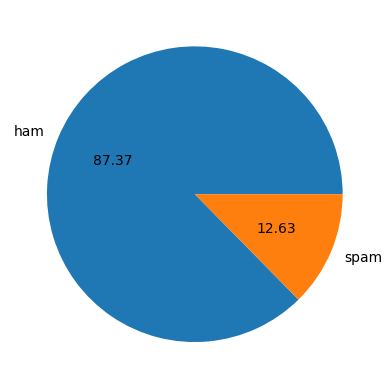

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [28]:
# Data is imbalance 

In [29]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pradn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['num_characters']=df['review'].apply(len)
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [31]:
df.head()

,target,review,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# Number of words
df["num_words"]=df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,review,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df["num_sen"]=df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))
# df["nums_sen"]

In [35]:
df.head()

,target,review,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
print(df.columns)

Index(['target', 'review', 'num_characters', 'num_words', 'num_sen'], dtype='object')


In [38]:
#ham messeges
df[df['target']==0]  [['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#sapm messeges
df[df['target']==1]  [['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


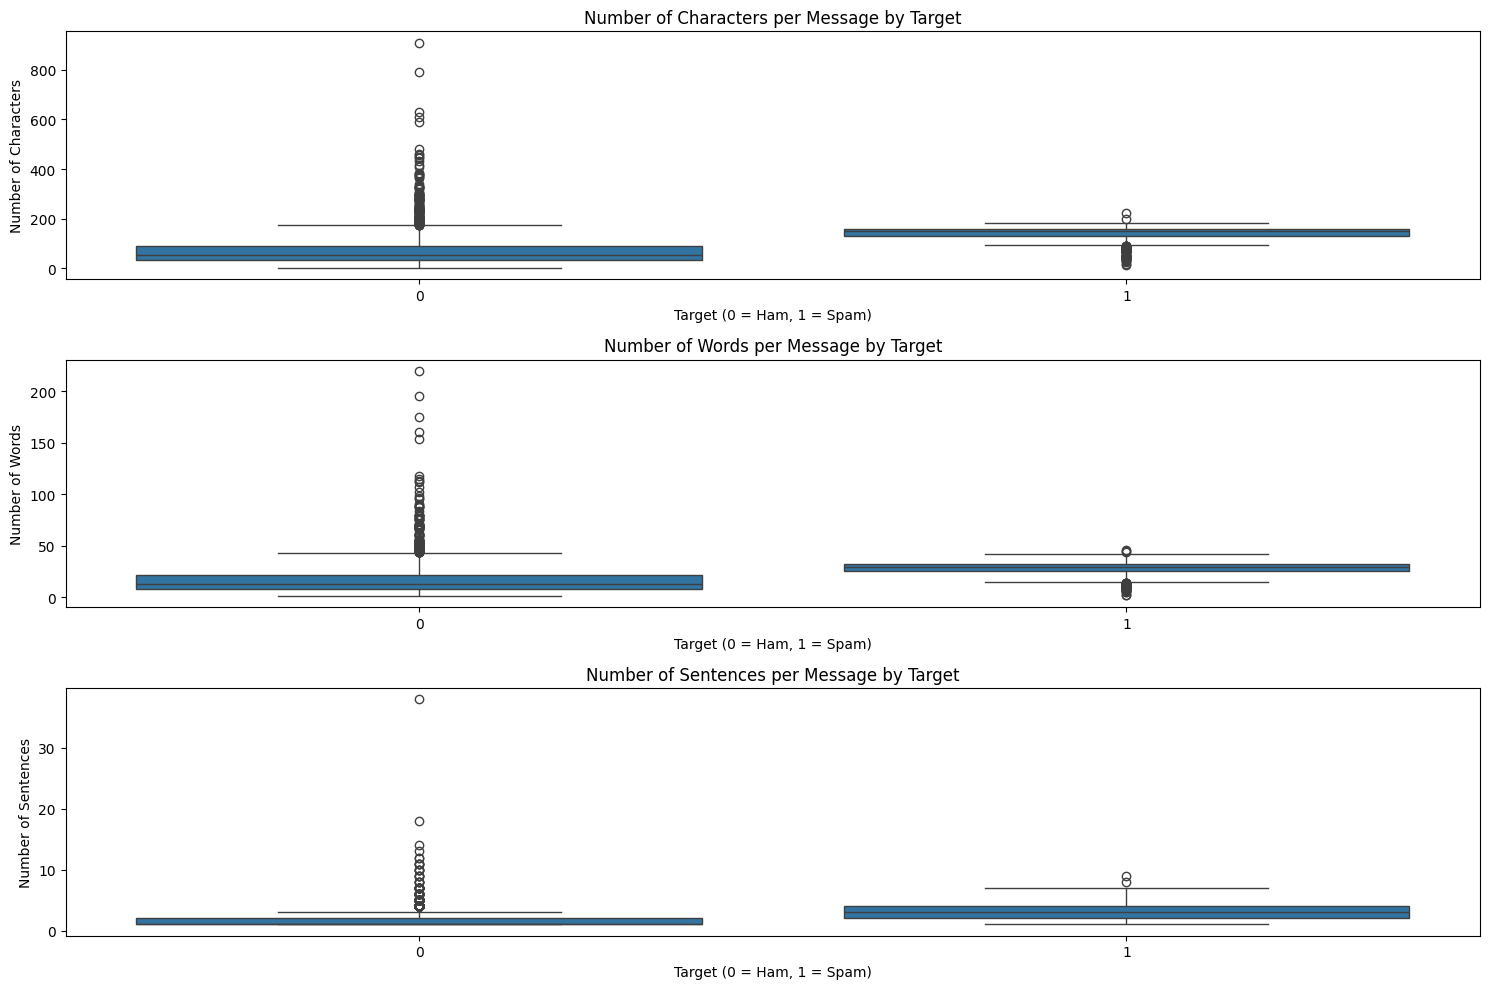

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Boxplot for 'num_characters'
plt.subplot(3, 1, 1)
sns.boxplot(x='target', y='num_characters', data=df)
plt.title('Number of Characters per Message by Target')
plt.xlabel('Target (0 = Ham, 1 = Spam)')
plt.ylabel('Number of Characters')

# Boxplot for 'num_words'
plt.subplot(3, 1, 2)
sns.boxplot(x='target', y='num_words', data=df)
plt.title('Number of Words per Message by Target')
plt.xlabel('Target (0 = Ham, 1 = Spam)')
plt.ylabel('Number of Words')

# Boxplot for 'num_sen'
plt.subplot(3, 1, 3)
sns.boxplot(x='target', y='num_sen', data=df)
plt.title('Number of Sentences per Message by Target')
plt.xlabel('Target (0 = Ham, 1 = Spam)')
plt.ylabel('Number of Sentences')

plt.tight_layout()
plt.show()


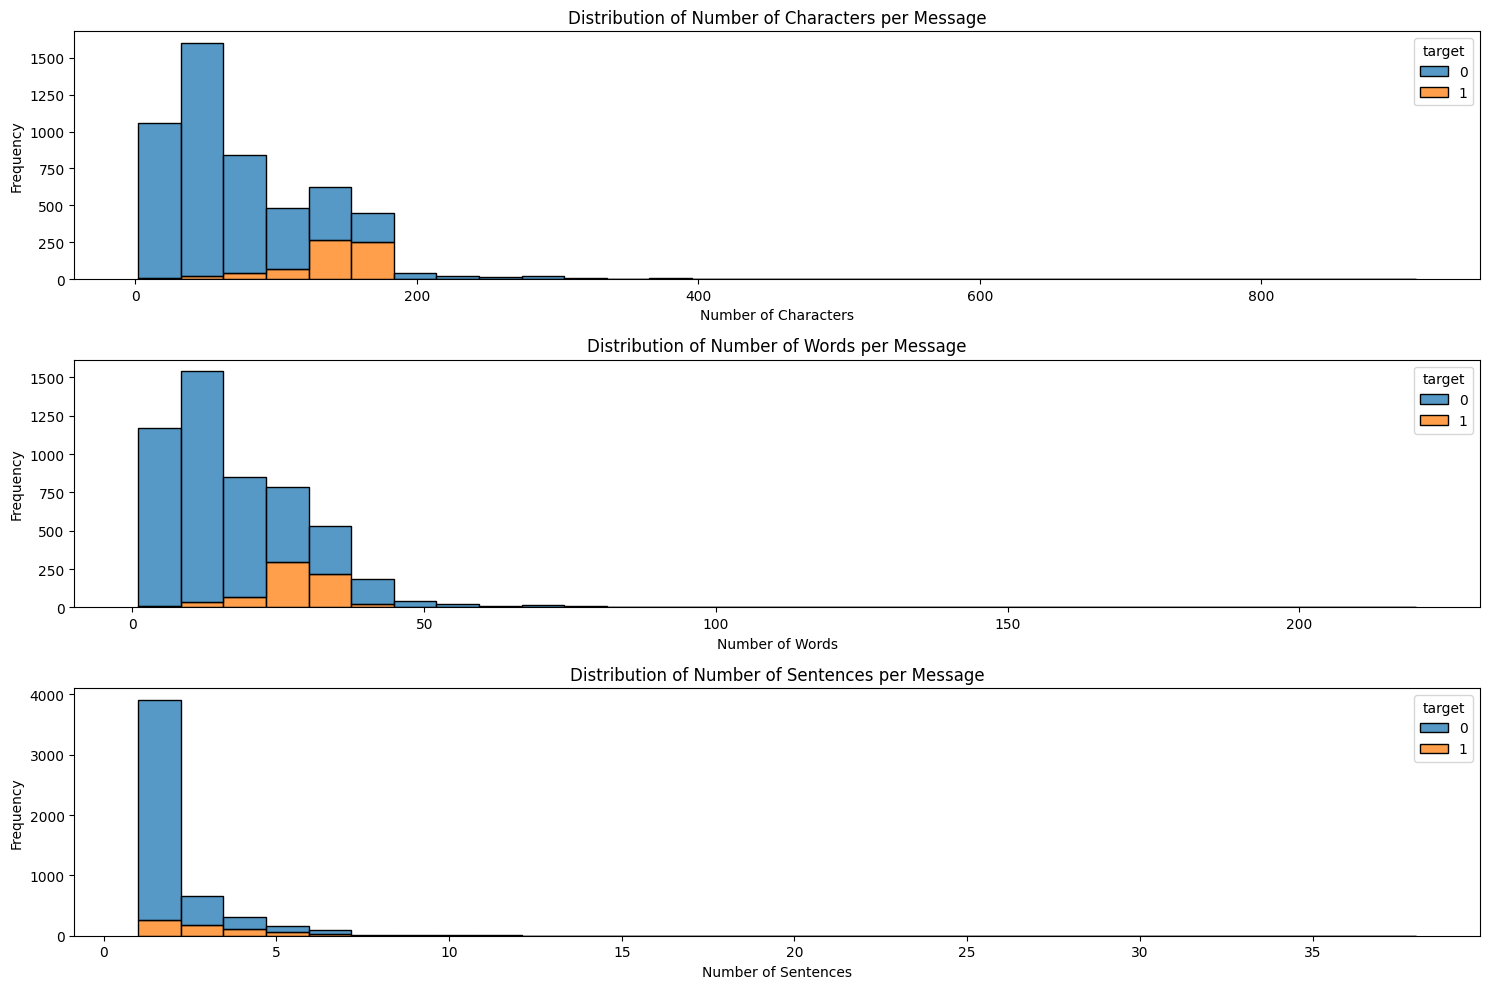

In [41]:
plt.figure(figsize=(15, 10))

# Histogram for 'num_characters'
plt.subplot(3, 1, 1)
sns.histplot(data=df, x='num_characters', hue='target', multiple='stack', bins=30)
plt.title('Distribution of Number of Characters per Message')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Histogram for 'num_words'
plt.subplot(3, 1, 2)
sns.histplot(data=df, x='num_words', hue='target', multiple='stack', bins=30)
plt.title('Distribution of Number of Words per Message')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for 'num_sen'
plt.subplot(3, 1, 3)
sns.histplot(data=df, x='num_sen', hue='target', multiple='stack', bins=30)
plt.title('Distribution of Number of Sentences per Message')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<Axes: xlabel='num_characters', ylabel='Count'>

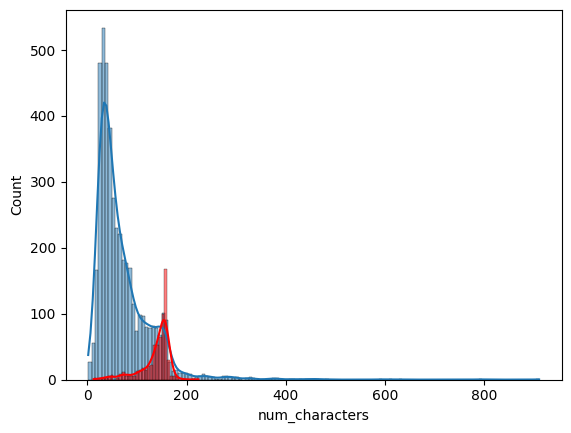

In [42]:
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham (target=0)', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam (target=1)', color='red', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

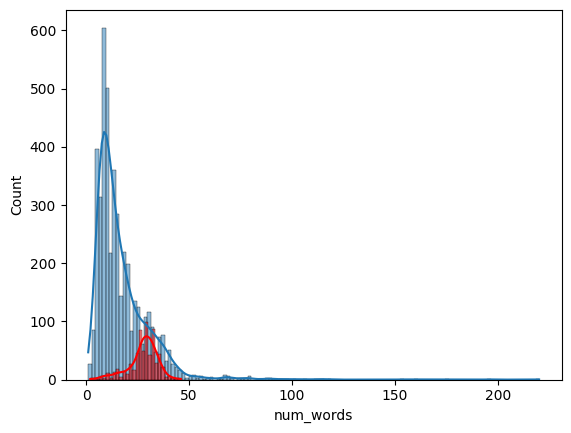

In [43]:
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham (target=0)', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam (target=1)', color='red', kde=True)

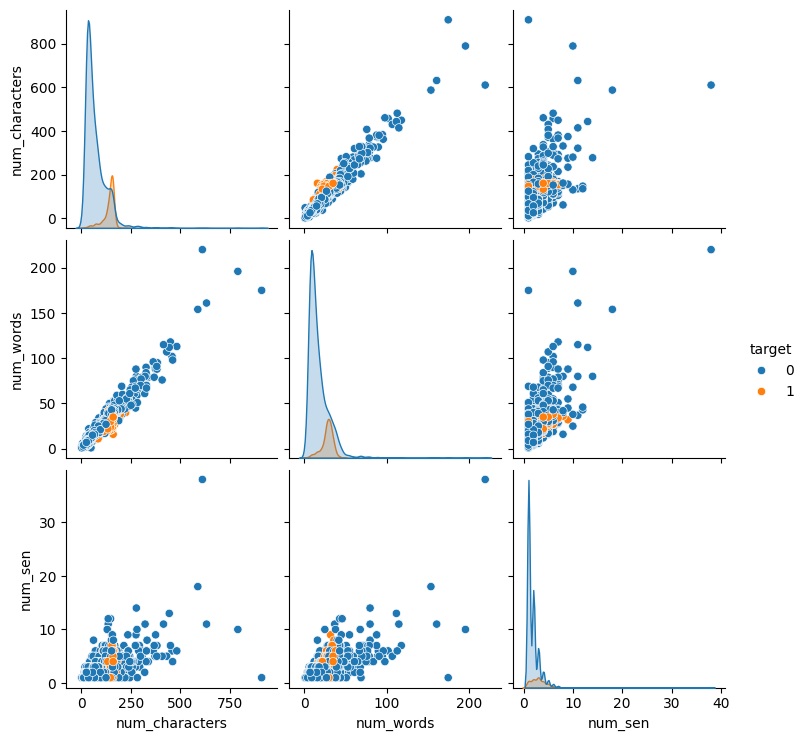

In [44]:
sns.pairplot(df,hue='target')

In [45]:
df.head()

,target,review,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
correlation_matrix = df[['target','num_characters', 'num_words', 'num_sen']].corr()

In [47]:
correlation_matrix

,target,num_characters,num_words,num_sen
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sen,0.263939,0.624139,0.679971,1.000000


<Axes: >

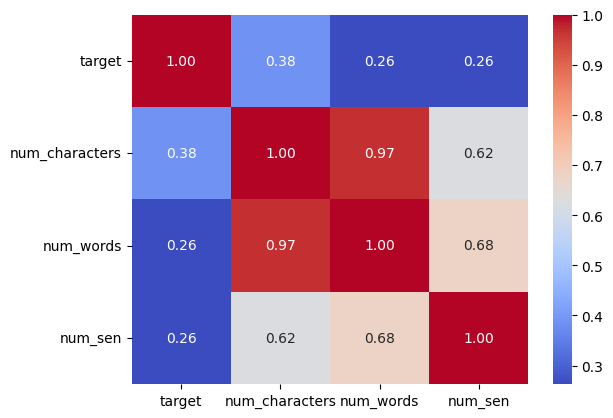

In [48]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [50]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i);
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [52]:
import nltk
nltk.download('stopwords')
# stopwords.words('english')
import string
string.punctuation
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
transform_text("i am loved and enjoying this stuff")

'love enjoy stuff'

In [54]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem( "running")


'run'

In [55]:
df['transformed_text']=df['review'].apply(transform_text)

In [56]:
df.head()

,target,review,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


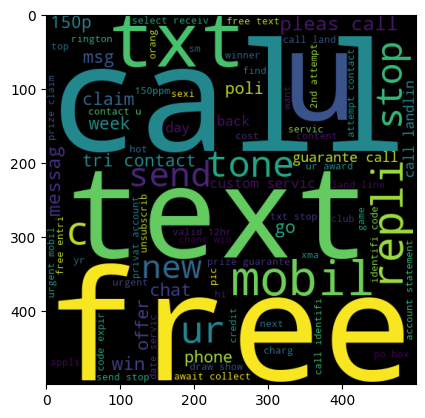

In [58]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
text_data = df[df['target'] == 1]['transformed_text'].str.cat(sep=' ')
spam_wc=wc.generate(text_data)
plt.imshow(spam_wc)

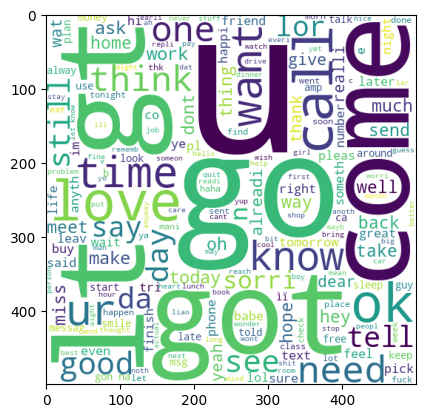

In [59]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
text_data = df[df['target'] == 0]['transformed_text'].str.cat(sep=' ')
spam_wc=wc.generate(text_data)
plt.imshow(spam_wc)

In [60]:
df.head()

,target,review,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

In [63]:
pip install collection


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
spam_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

4. Model Building


In [65]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [67]:
y=df['target'].values


In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [71]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

In [72]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [73]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [74]:
bnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


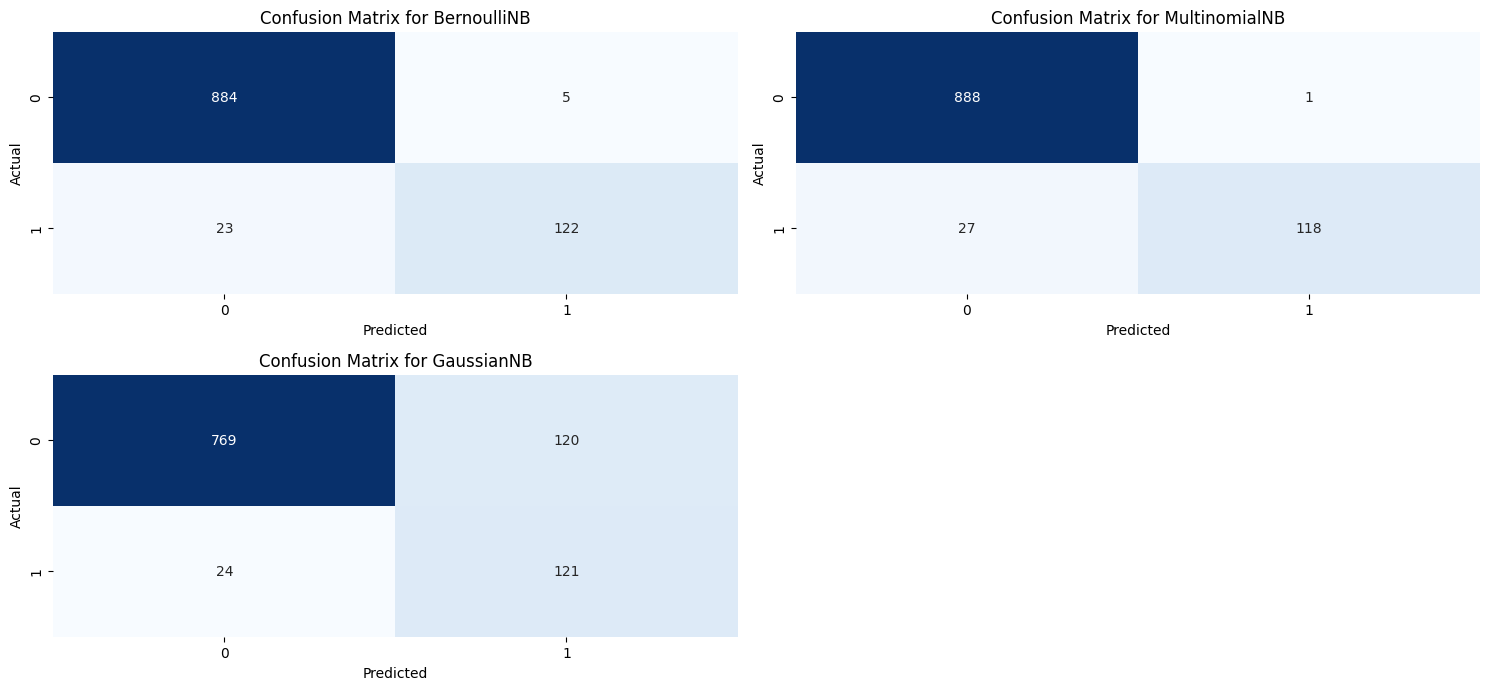

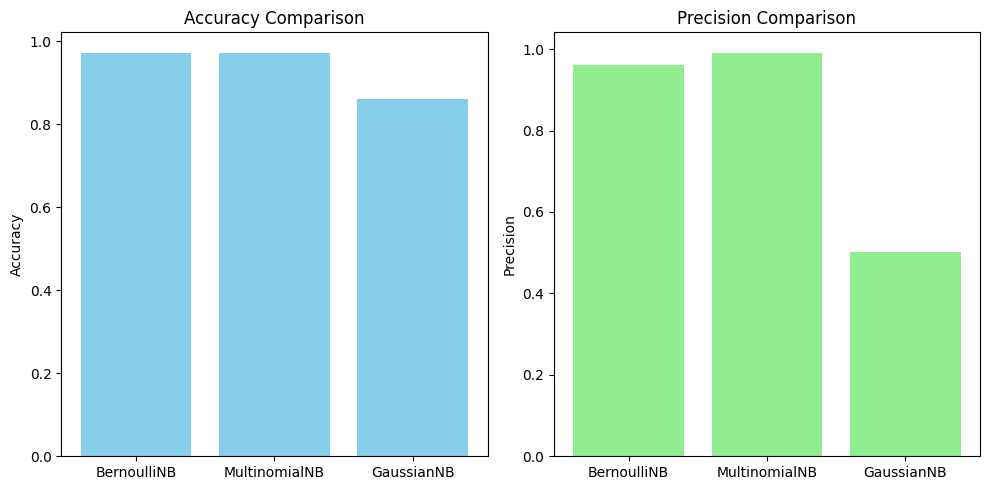

In [75]:

# Initialize plot size
plt.figure(figsize=(15, 10))

# Define classifiers and labels
classifiers = [('BernoulliNB', bnb), ('MultinomialNB', mnb), ('GaussianNB', gnb)]
y_preds = []

# Fit, predict and store predictions for each classifier
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_preds.append((clf_name, clf.predict(x_test)))

# Plot confusion matrices
for i, (clf_name, y_pred) in enumerate(y_preds, 1):
    plt.subplot(3, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# Show the confusion matrices
plt.tight_layout()
plt.show()

# Now visualize the accuracy, precision, etc.
accuracies = []
precisions = []

# Calculate metrics for each classifier
for clf_name, y_pred in y_preds:
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=1)  # Handle zero division error
    accuracies.append(acc)
    precisions.append(prec)

# Create a bar plot for comparison of accuracy and precision
plt.figure(figsize=(10, 5))

# Accuracy Bar Plot
plt.subplot(1, 2, 1)
plt.bar([clf_name for clf_name, _ in y_preds], accuracies, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Precision Bar Plot
plt.subplot(1, 2, 2)
plt.bar([clf_name for clf_name, _ in y_preds], precisions, color='lightgreen')
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Show plots
plt.tight_layout()
plt.show()


In [76]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [80]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision



In [81]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [82]:

accuracy_scores = []
precision_scores = []

In [83]:

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  RF
Accuracy -  0.971953578336557
Precision -  0.9754098360655737
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8840579710144928
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [84]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
9,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.962282,0.884058
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [86]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [87]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,GBDT,Accuracy,0.946809
5,SVC,Accuracy,0.976789
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.962282
8,LR,Accuracy,0.946809
9,AdaBoost,Accuracy,0.950677


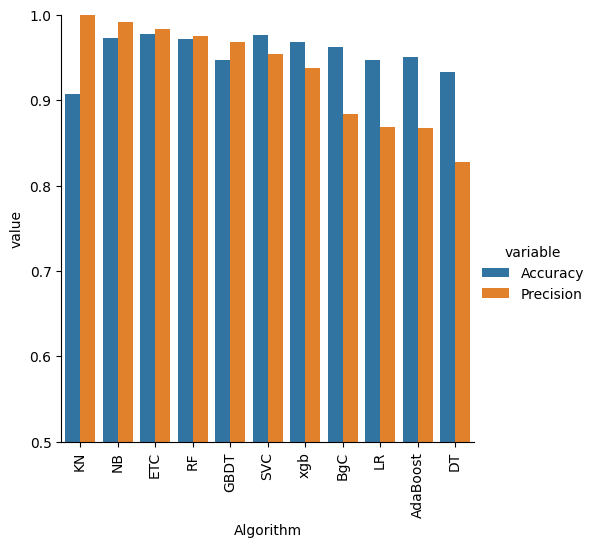

In [88]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [91]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [92]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.907157,1.000000,0.907157,1.000000
1,NB,0.972921,0.991597,0.972921,0.991597
2,ETC,0.977756,0.984127,0.977756,0.984127
3,RF,0.971954,0.975410,0.971954,0.975410
4,GBDT,0.946809,0.968750,0.946809,0.968750
5,SVC,0.976789,0.954887,0.976789,0.954887
6,xgb,0.968085,0.937500,0.968085,0.937500
7,BgC,0.962282,0.884058,0.962282,0.884058
8,LR,0.946809,0.868852,0.946809,0.868852
9,AdaBoost,0.950677,0.867188,0.950677,0.867188


In [109]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('mb', mnb), ('et', etc)],voting='soft')

In [111]:

voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [113]:

y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9921875


In [114]:
# Applying stacking
estimators=[('svm', svc), ('mb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [115]:
from sklearn.ensemble import StackingClassifier

In [116]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [117]:

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9496402877697842


In [119]:
print(mnb)

MultinomialNB()


In [132]:
mnb.fit(x_train,y_train)
mnb.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

In [133]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [128]:
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Define models
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create VotingClassifier with soft voting
voting = VotingClassifier(estimators=[('svm', svc), ('mnb', mnb), ('et', etc)], voting='soft')

# Fit the model
voting.fit(x_train, y_train)



VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [130]:
voting.predict(x_test)


array([0, 0, 0, ..., 1, 0, 0])